In [3]:
# manual press to capture

import cv2
import mediapipe as mp
import csv
import os

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize MediaPipe Drawing
mp_drawing = mp.solutions.drawing_utils

# Initialize the camera
camera = cv2.VideoCapture(0)  # Change the argument to the camera index if you have multiple cameras

# Create directories for A, B, C, D, and E if they don't exist
gestures = ['A', 'B', 'C', 'D', 'E']
for gesture in gestures:
    os.makedirs(f'dataset/{gesture}', exist_ok=True)

# Display instructions
print("Press 'a' for A, 'b' for B, 'c' for C, 'd' for D, 'e' for E, and 'q' to quit.")

columns = [
    # ... (rest of your columns remain the same)
    'PINKY_TIP_X', 'PINKY_TIP_Y', 'PINKY_TIP_Z',
    'label'
]

while True:
    ret, frame = camera.read()
    frame = cv2.flip(frame, 1)

    # Convert the image to RGB and process it using MediaPipe Hands
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    label = None  # Initialize label
    key = cv2.waitKey(1)
    if key == ord('a'):
        label = 'A'
    elif key == ord('b'):
        label = 'B'
    elif key == ord('c'):
        label = 'C'
    elif key == ord('d'):
        label = 'D'
    elif key == ord('e'):
        label = 'E'
    elif key == ord('q'):
        break
    elif key == 27:
        break

    if results.multi_hand_landmarks and label is not None:
        for hand_landmarks in results.multi_hand_landmarks:
            row_data = []
            for landmark in hand_landmarks.landmark:
                row_data.extend([landmark.x, landmark.y, landmark.z if landmark.z is not None else 0.0])

            row_data.append(label)  # Append label to the end

            # Save data to the respective CSV file based on the label
            with open(f'dataset/{label}/{label}_hand_landmarks.csv', mode='a', newline='') as csv_file:
                csv_writer = csv.writer(csv_file)
                if csv_file.tell() == 0:  # Write header only if the file is empty
                    csv_writer.writerow(columns)  # Writing column names as header
                csv_writer.writerow(row_data)

            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.imshow('Hand Landmarks', frame)

# Release resources
camera.release()
cv2.destroyAllWindows()


Press 'a' for A, 'b' for B, 'c' for C, 'd' for D, 'e' for E, and 'q' to quit.


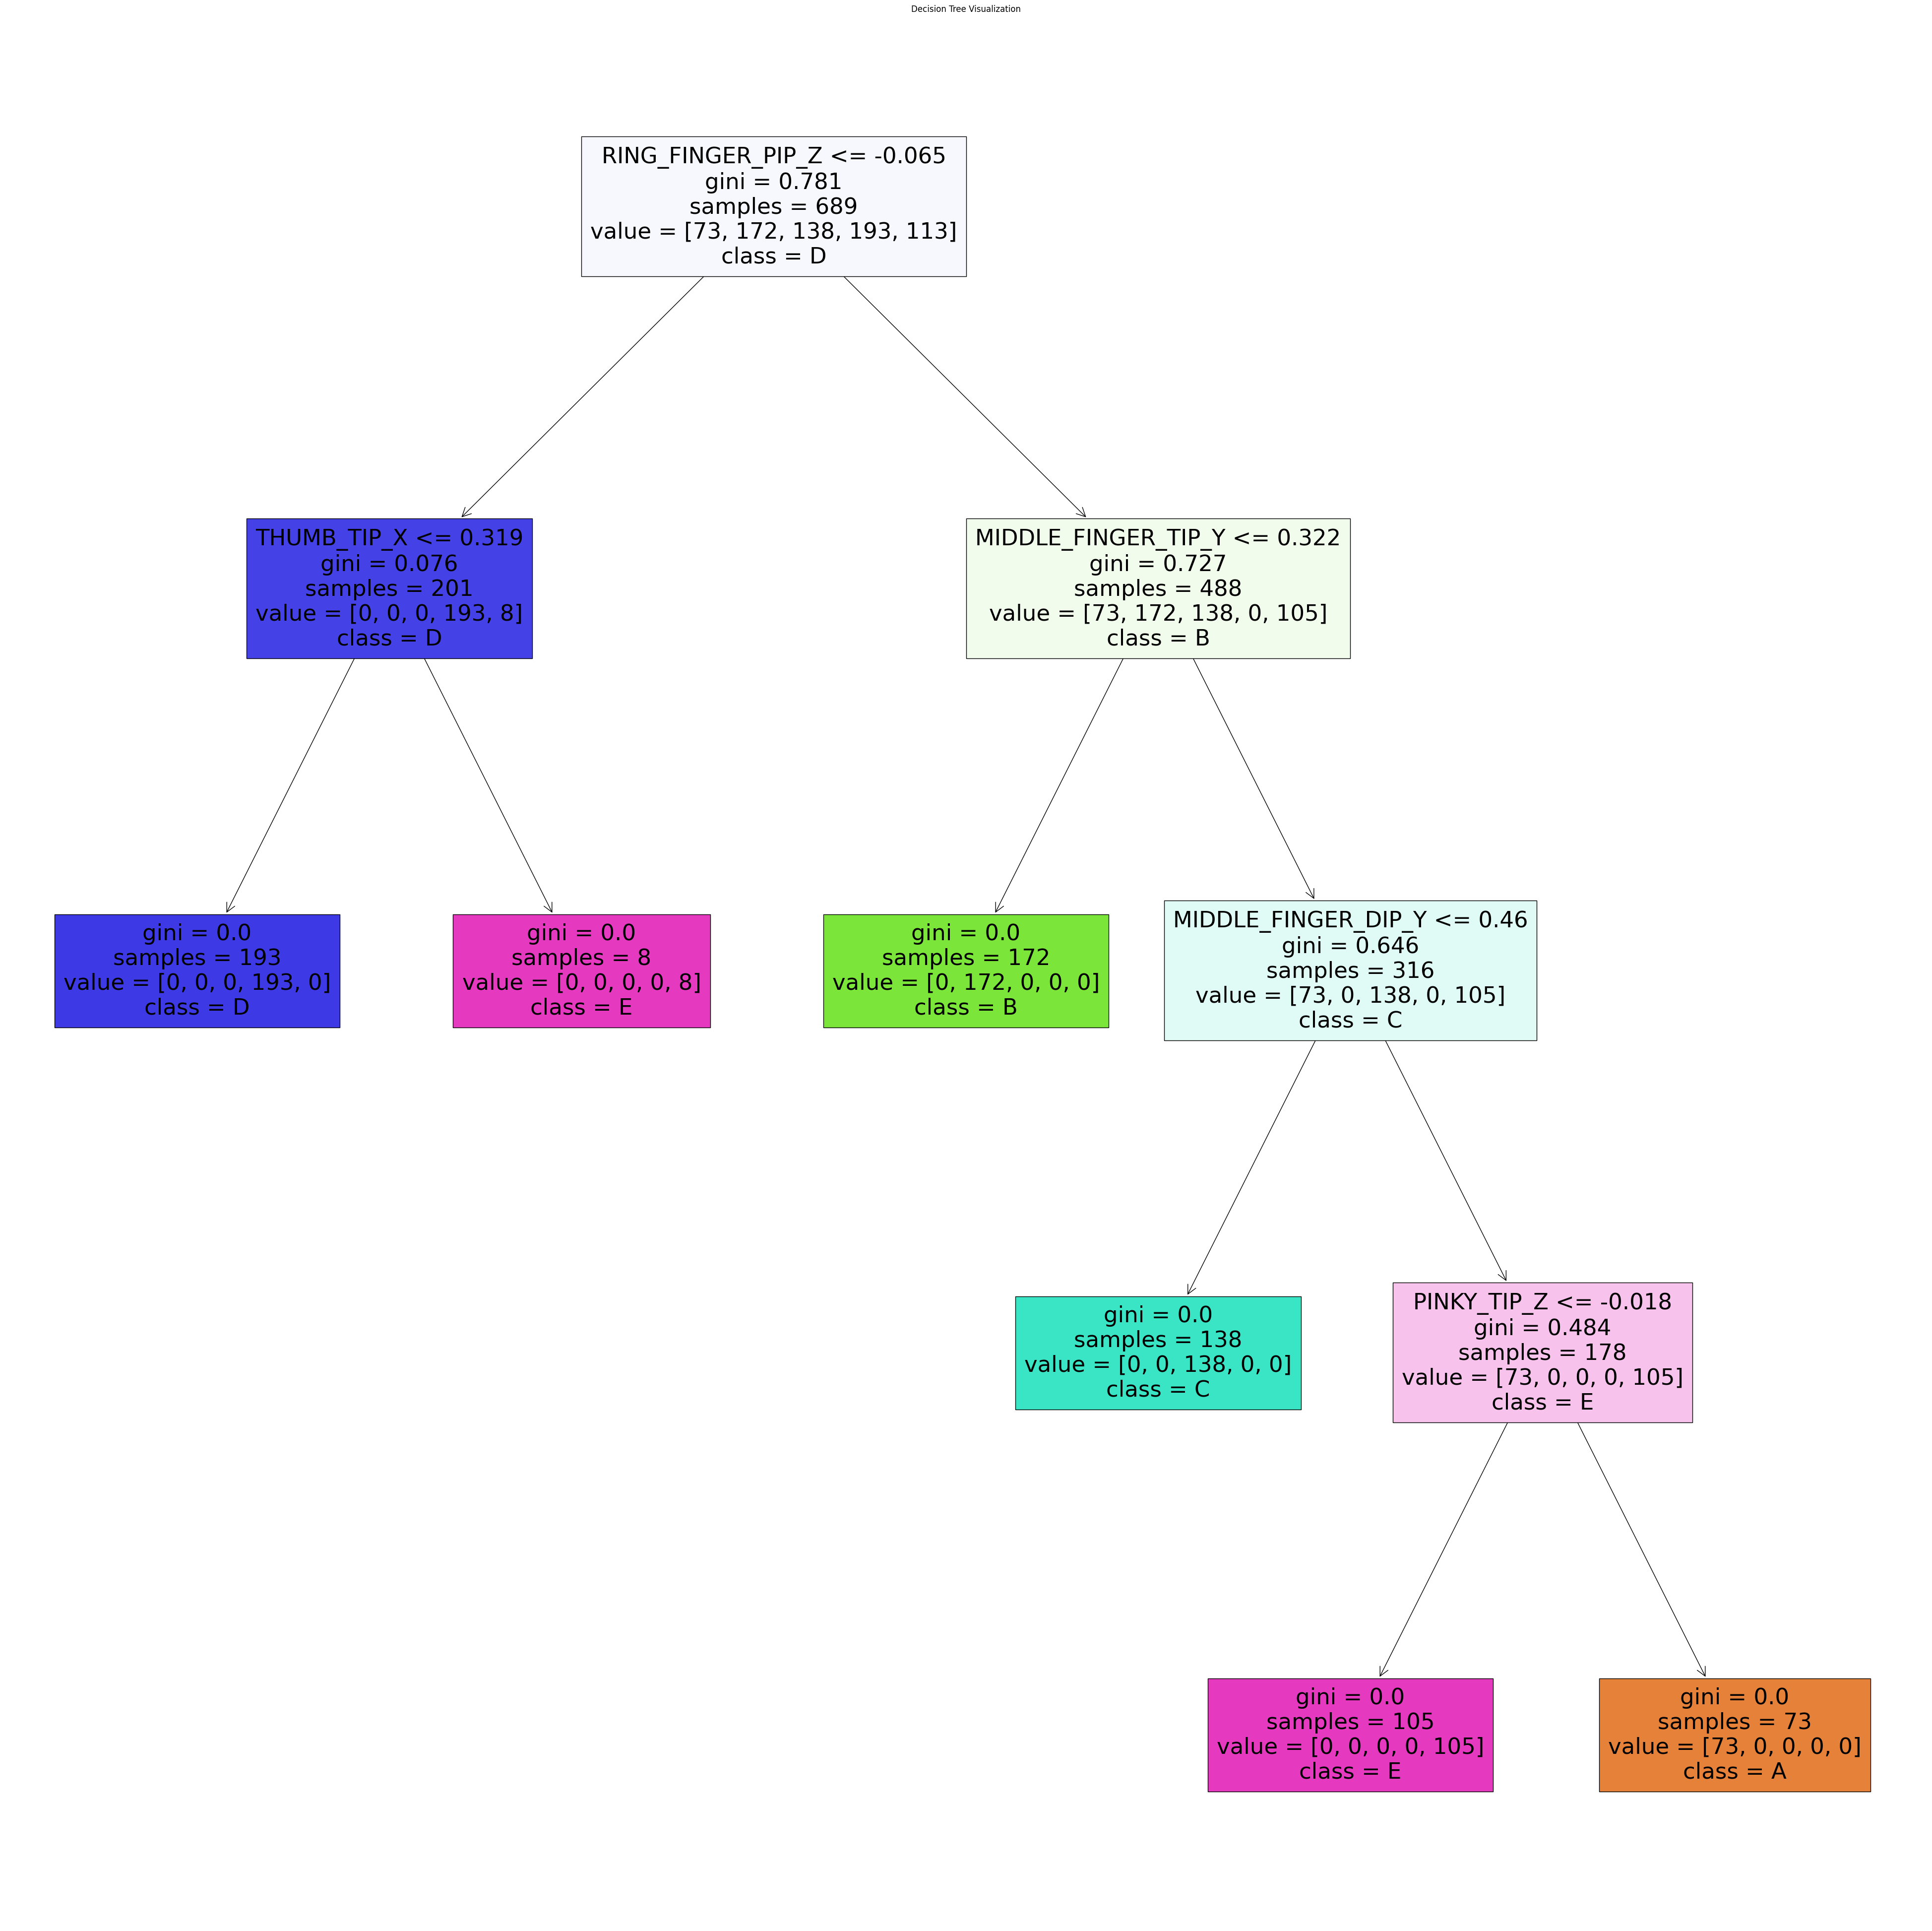

Predicted values:
['E' 'D' 'E' 'D' 'E' 'B' 'B' 'D' 'C' 'B' 'C' 'D' 'C' 'B' 'A' 'B' 'E' 'B'
 'B' 'A' 'D' 'C' 'B' 'B' 'D' 'C' 'C' 'C' 'D' 'E' 'D' 'B' 'B' 'B' 'C' 'C'
 'C' 'C' 'C' 'E' 'D' 'C' 'C' 'B' 'B' 'E' 'E' 'A' 'B' 'B' 'D' 'C' 'B' 'C'
 'C' 'A' 'A' 'B' 'B' 'B' 'D' 'A' 'B' 'E' 'B' 'A' 'E' 'C' 'B' 'E' 'D' 'B'
 'E' 'B' 'A' 'B' 'E' 'C' 'B' 'A' 'B' 'C' 'D' 'D' 'E' 'C' 'C' 'B' 'B' 'C'
 'C' 'E' 'D' 'D' 'B' 'C' 'E' 'D' 'B' 'A' 'B' 'D' 'B' 'B' 'C' 'D' 'B' 'C'
 'C' 'E' 'E' 'D' 'B' 'D' 'C' 'D' 'C' 'E' 'D' 'E' 'B' 'E' 'E' 'B' 'C' 'C'
 'E' 'D' 'B' 'D' 'B' 'B' 'C' 'D' 'E' 'D' 'B' 'B' 'A' 'E' 'D' 'D' 'D' 'C'
 'C' 'C' 'D' 'E' 'B' 'E' 'E' 'D' 'C' 'E' 'C' 'B' 'C' 'C' 'D' 'C' 'C' 'B'
 'C' 'A' 'E' 'C' 'D' 'E' 'E' 'B' 'D' 'B' 'E' 'A' 'C' 'B' 'E' 'C' 'D' 'D'
 'B' 'C' 'B' 'A' 'D' 'D' 'C' 'B' 'D' 'B' 'C' 'A' 'C' 'E' 'B' 'B' 'B' 'B'
 'C' 'D' 'C' 'A' 'C' 'B' 'D' 'E' 'B' 'C' 'B' 'B' 'C' 'D' 'B' 'C' 'B' 'E'
 'C' 'B' 'A' 'D' 'B' 'C' 'B' 'E' 'C' 'C' 'B' 'B' 'B' 'C' 'D' 'C' 'B' 'D'
 'B' 'D' 'C' 'E' 'C' 'B' 'D' 'B' 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import joblib

# Function to import and combine datasets for rock, paper, and scissor
def import_and_combine_datasets():
    # Read CSV files for rock, paper, and scissor gestures
    gestures = ['A', 'B', 'C', 'D', 'E']
    data_frames = []
    column_names = [
        'WRIST_X', 'WRIST_Y', 'WRIST_Z',
    'THUMB_CMC_X', 'THUMB_CMC_Y', 'THUMB_CMC_Z',
    'THUMB_MCP_X', 'THUMB_MCP_Y', 'THUMB_MCP_Z',
    'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z',
    'THUMB_TIP_X', 'THUMB_TIP_Y', 'THUMB_TIP_Z',
    'INDEX_FINGER_MCP_X', 'INDEX_FINGER_MCP_Y', 'INDEX_FINGER_MCP_Z',
    'INDEX_FINGER_PIP_X', 'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_PIP_Z',
    'INDEX_FINGER_DIP_X', 'INDEX_FINGER_DIP_Y', 'INDEX_FINGER_DIP_Z',
    'INDEX_FINGER_TIP_X', 'INDEX_FINGER_TIP_Y', 'INDEX_FINGER_TIP_Z',
    'MIDDLE_FINGER_MCP_X', 'MIDDLE_FINGER_MCP_Y', 'MIDDLE_FINGER_MCP_Z',
    'MIDDLE_FINGER_PIP_X', 'MIDDLE_FINGER_PIP_Y', 'MIDDLE_FINGER_PIP_Z',
    'MIDDLE_FINGER_DIP_X', 'MIDDLE_FINGER_DIP_Y', 'MIDDLE_FINGER_DIP_Z',
    'MIDDLE_FINGER_TIP_X', 'MIDDLE_FINGER_TIP_Y', 'MIDDLE_FINGER_TIP_Z',
    'RING_FINGER_MCP_X', 'RING_FINGER_MCP_Y', 'RING_FINGER_MCP_Z',
    'RING_FINGER_PIP_X', 'RING_FINGER_PIP_Y', 'RING_FINGER_PIP_Z',
    'RING_FINGER_DIP_X', 'RING_FINGER_DIP_Y', 'RING_FINGER_DIP_Z',
    'RING_FINGER_TIP_X', 'RING_FINGER_TIP_Y', 'RING_FINGER_TIP_Z',
    'PINKY_MCP_X', 'PINKY_MCP_Y', 'PINKY_MCP_Z',
    'PINKY_PIP_X', 'PINKY_PIP_Y', 'PINKY_PIP_Z',
    'PINKY_DIP_X', 'PINKY_DIP_Y', 'PINKY_DIP_Z',
    'PINKY_TIP_X', 'PINKY_TIP_Y', 'PINKY_TIP_Z',
    'label'
    ]

    for gesture in gestures:
        file_path = f'dataset/{gesture}/{gesture}_hand_landmarks.csv'
        df = pd.read_csv(file_path, skiprows=1, names=column_names)
        data_frames.append(df)

    # Concatenate data frames for all gestures into a single data frame
    combined_df = pd.concat(data_frames)
    return combined_df

# Function to split the dataset
def split_dataset(combined_data):
    X = combined_data.drop('label', axis=1)  # Features (hand landmarks data)
    y = combined_data['label']  # Target variable (gesture labels)

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=100)
    return X_train, X_test, y_train, y_test

# Function to train the decision tree classifier
def train_decision_tree(X_train, X_test, y_train):
    clf = DecisionTreeClassifier(
        criterion="gini", random_state=100, max_depth=10, min_samples_leaf=5)
    clf.fit(X_train, y_train)
    return clf

# Function to make predictions
def make_predictions(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def calculate_accuracy(y_test, y_pred):
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)
    print("Report : ", classification_report(y_test, y_pred))

# Driver code
def main():
    # Import and combine datasets for rock, paper, and scissor gestures
    combined_data = import_and_combine_datasets()

    # Split the combined dataset
    X_train, X_test, y_train, y_test = split_dataset(combined_data)

    # Train the decision tree classifier
    clf = train_decision_tree(X_train, X_test, y_train)

    joblib.dump(clf, "model.h5")

    # Visualize the decision tree
    plt.figure(figsize=(50, 50))
    plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, filled=True)
    plt.title("Decision Tree Visualization")
    plt.show()
    # plt.savefig('decision_tree_visualization.svg') 

    # Make predictions
    y_pred = make_predictions(X_test, clf)

    # Calculate accuracy
    calculate_accuracy(y_test, y_pred)

# Calling main function
if __name__ == "__main__":
    main()
